# Topic 1A 
**What time and space like interactions are most significant in multivariate systems?**

Setup
1.	Generate a 3D dataframe of times, variables, and their values, for a given timeseries of the first category of specifically discretised interactions.
2.	Write code to compute a list of cliques and their mutual information for a given 3D dataframe. The dataframe should contain the desired variables and their values over time. (for 3 variables, the output list should have length 14)
3.	Store the mutual informations as 2D matrix in a list, so a 3D dataframe.
4.	Plot <MI> vs dt, what result?

___________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Import libraries

In [1]:
from functions import *

Import test data

In [2]:
# Generate a random timeseries for testing
num_variables = 9
time_length = 1000

random_timeseries = generate_random_timeseries(num_variables, time_length)

In [4]:
df = pd.read_csv("C:\\Users\\cyril\\Documents\\Personal\\Github\\PhD_1\\Data\\timeseries_test.txt", sep='\t', header=None, usecols=lambda col: col != 'Time')  # choose between timeseries_test.txt and timeseries_test2.txt

Plot the first 3 timeseries for visualization

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


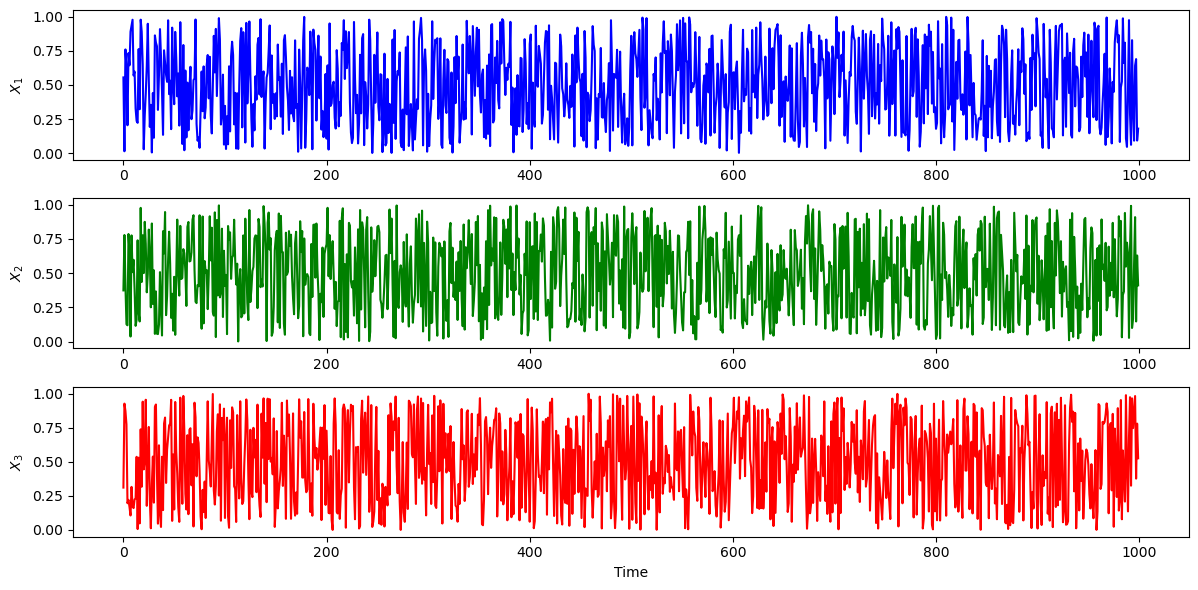

In [5]:
# Convert columns 1, 2, and 3 into lists of values
x_t = df.iloc[:, 0].tolist()
y_t = df.iloc[:, 1].tolist()
z_t = df.iloc[:, 2].tolist()
time = np.arange(0, len(x_t))

# Create the figure and subplots
plt.figure(figsize=(12, 6))  # Adjust the figure size to fit 3 plots

# First subplot for Series 1
plt.subplot(3, 1, 1)  # (3 rows, 1 column, first subplot)
plt.plot(time, x_t, label='Series 1', color='blue')
#plt.xlabel('Time')
plt.ylabel('$X_{1}$')
#plt.title('Series 1')
#plt.legend()

# Second subplot for Series 2
plt.subplot(3, 1, 2)  # (3 rows, 1 column, second subplot)
plt.plot(time, y_t, label='Series 2', color='green')
#plt.xlabel('Time')
plt.ylabel('$X_{2}$')
#plt.title('Series 2')
#plt.legend()

# Third subplot for Series 3
plt.subplot(3, 1, 3)  # (3 rows, 1 column, third subplot)
plt.plot(time, z_t, label='Series 3', color='red')
plt.xlabel('Time')
plt.ylabel('$X_{3}$')
#plt.title('Series 3')
#plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Use infotopo module to obtain the topological information metrics (entropy, mutual information and total correlation)

In [6]:
# Obtain topological information metrics using infotopo
def obtain_infotopo_metrics(dataset, dimension_max=0, dimension_tot=0):

    if dimension_max == 0:
        dimension_max = 3 #dataset.shape[1]
    if dimension_tot == 0:
        dimension_tot = 9 #dataset.shape[1]
    
    sample_size = dataset.shape[0]
    nb_of_values = 16
    forward_computation_mode = False
    work_on_transpose = False
    supervised_mode = False
    sampling_mode = 1
    deformed_probability_mode = False

    information_topo = infotopo.infotopo(dimension_max = dimension_max,
                                dimension_tot = dimension_tot,
                                sample_size = sample_size,
                                work_on_transpose = work_on_transpose,
                                nb_of_values = nb_of_values,
                                sampling_mode = sampling_mode,
                                deformed_probability_mode = deformed_probability_mode,
                                supervised_mode = supervised_mode,
                                forward_computation_mode = forward_computation_mode)
    
    Nentropie = information_topo.simplicial_entropies_decomposition(dataset)
    Ninfomut = information_topo.simplicial_infomut_decomposition(Nentropie)
    
    return  Nentropie, Ninfomut

In [7]:
dimension_max = 5 #df.shape[1]
dimension_tot = 5 #df.shape[1]
bunch = dataframe_to_bunch(df)
Nentropie, Ninfomut = obtain_infotopo_metrics(bunch.data, dimension_max, dimension_tot)

Percent of tuples processed : 0


In [8]:
Nentropie

{(5,): 2.862299543626351,
 (4,): 2.8689077192653034,
 (3,): 2.866237673569502,
 (2,): 2.8765967707579834,
 (1,): 2.6388866545576435,
 (4, 5): 5.4787107131099315,
 (3, 5): 5.641765965122622,
 (2, 5): 5.657060570985948,
 (1, 5): 5.4318948972482115,
 (3, 4): 5.525356535910556,
 (2, 4): 5.667649848171689,
 (1, 4): 5.437046128083156,
 (2, 3): 5.535691468662462,
 (1, 3): 5.422920628824274,
 (1, 2): 5.231599947725231,
 (3, 4, 5): 7.706768082366595,
 (2, 4, 5): 7.782485746419819,
 (1, 4, 5): 7.6435272182498215,
 (2, 3, 5): 7.8562748330304375,
 (1, 3, 5): 7.765567908035389,
 (1, 2, 5): 7.622610364959012,
 (2, 3, 4): 7.7744584929101075,
 (1, 3, 4): 7.649618835167175,
 (1, 2, 4): 7.623289125479219,
 (1, 2, 3): 7.501792745265553,
 (2, 3, 4, 5): 9.12622522666844,
 (1, 3, 4, 5): 9.055590870214264,
 (1, 2, 4, 5): 9.052790807397107,
 (1, 2, 3, 5): 9.104903621226605,
 (1, 2, 3, 4): 9.010915182604336,
 (1, 2, 3, 4, 5): 9.717367388199774}

In [9]:
Ninfomut

{(5,): 2.862299543626351,
 (4,): 2.8689077192653034,
 (3,): 2.866237673569502,
 (2,): 2.8765967707579834,
 (1,): 2.6388866545576435,
 (4, 5): 0.2524965497817231,
 (3, 5): 0.08677125207323133,
 (2, 5): 0.08183574339838628,
 (1, 5): 0.06929130093578273,
 (3, 4): 0.20978885692424942,
 (2, 4): 0.07785464185159707,
 (1, 4): 0.07074824573979033,
 (2, 3): 0.2071429756650236,
 (1, 3): 0.08220369930287141,
 (1, 2): 0.283883477590396,
 (3, 4, 5): -0.34162019531535837,
 (2, 4, 5): -0.4131313521981115,
 (1, 4, 5): -0.33403060274218,
 (2, 3, 5): -0.3731091837867586,
 (1, 3, 5): -0.3635897114062212,
 (1, 2, 5): -0.320162082058399,
 (2, 3, 4): -0.3424971962418111,
 (1, 3, 4): -0.36167241025836283,
 (1, 2, 4): -0.3286156539199263,
 (1, 2, 3): -0.30669820106128487,
 (2, 3, 4, 5): -0.03843146668555342,
 (1, 3, 4, 5): 0.008527896324764583,
 (1, 2, 4, 5): -0.038149769406125245,
 (1, 2, 3, 5): -0.03557060599348105,
 (1, 2, 3, 4): -0.03139172300921622,
 (1, 2, 3, 4, 5): 0.3765666899048501}

In [10]:
Nfree_energy = obtain_total_correlations(Nentropie)

c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 4

<Figure size 1800x1000 with 0 Axes>

In [11]:
average_free_energy = sum(Nfree_energy.values())/len(Nfree_energy.values())
print(average_free_energy)

average_free_energy_component = sum(Ninfomut.values())/len(Ninfomut.values())
print(average_free_energy_component)

NameError: name 'Nfree_energy' is not defined

Convert the total correlations list to a similar dictionary structure as for Ninfomut and Nentropie

In [10]:
# Define the dictionary with keys
TC_dict = dict(Ninfomut)
values = Nfree_energy.values()

# Assign values to the keys in order
for key, value in zip(TC_dict.keys(), values):
    TC_dict[key] = value

In [11]:
TC_dict

{(1,): 0.0,
 (2,): 0.0,
 (3,): 0.0,
 (4,): 0.0,
 (5,): 0.0,
 (6,): 0.0,
 (7,): 0.0,
 (8,): 0.0,
 (9,): 0.0,
 (1, 2): 0.19928013626566532,
 (1, 3): 0.1858261258742715,
 (1, 4): 0.21866657598547246,
 (1, 5): 0.22245042488061362,
 (1, 6): 0.18630465589838874,
 (1, 7): 0.20643564863610386,
 (1, 8): 0.20128779525760532,
 (1, 9): 0.22896228182869738,
 (2, 3): 0.19297534023470586,
 (2, 4): 0.19708137637741974,
 (2, 5): 0.18954323890838154,
 (2, 6): 0.1770789929051073,
 (2, 7): 0.16369302791153384,
 (2, 8): 0.20343358966144365,
 (2, 9): 0.19803430306119196,
 (3, 4): 0.2045917548081757,
 (3, 5): 0.18117314175721155,
 (3, 6): 0.17546323901553773,
 (3, 7): 0.19542026480509644,
 (3, 8): 0.1981695218996311,
 (3, 9): 0.212860097140382,
 (4, 5): 0.19538936740844903,
 (4, 6): 0.1645468060583788,
 (4, 7): 0.1871922297079971,
 (4, 8): 0.2521982904108473,
 (4, 9): 0.19735388919973396,
 (5, 6): 0.2018381803853586,
 (5, 7): 0.19420999519741766,
 (5, 8): 0.21760542733786803,
 (5, 9): 0.1962850634420512,
 (6

Compute TSE complexity from the given total correlations list

In [12]:
# Compute TSE complexity
tse_complexity = compute_tse_complexity(TC_dict)
print("TSE Complexity:", tse_complexity)

TSE Complexity: 1.8502045826148086


Plot the resulting high order structure for a given/adjustable significance

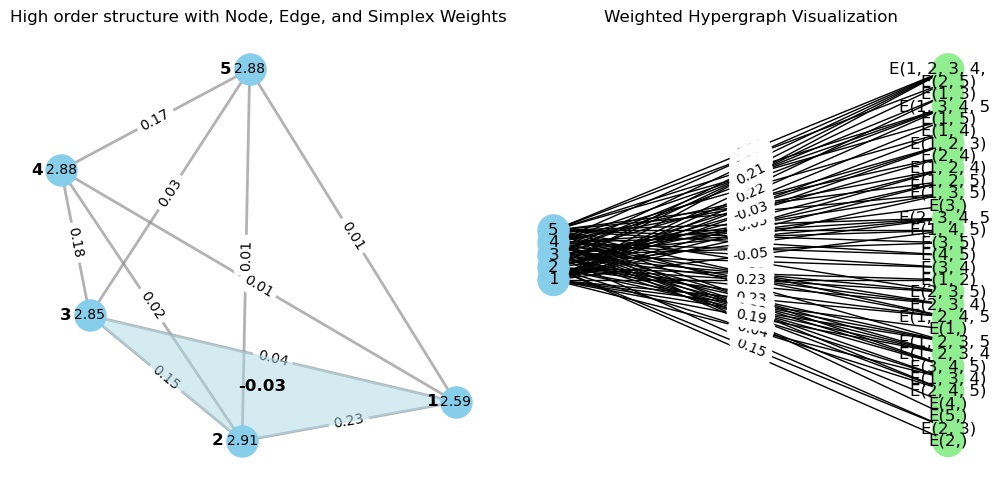

In [40]:
significance = 0

# Filter the interactions for a given significance and remove zero-weight hyperedges
hyperedges = {k: v for k, v in Ninfomut.items() if abs(v) > significance}

# Create a bipartite graph to represent the hypergraph
B = nx.Graph()

# Add nodes for each element in hyperedges
for edge, weight in hyperedges.items():
    edge_label = f"E{edge}"  # Label for the hyperedge
    B.add_node(edge_label, bipartite=1, weight=weight)  # Hyperedge node
    for node in edge:
        B.add_node(node, bipartite=0)  # Add regular graph node
        B.add_edge(edge_label, node, weight=weight)  # Connect hyperedge to its nodes

# Extract positions for bipartite graph layout
pos_B = nx.multipartite_layout(B, subset_key="bipartite")

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the size as needed

# Plot the simplicial complex in the first subplot (formerly second subplot)
# Given simplices with weights
simplices = hyperedges

# Create a graph to represent the simplicial complex
G = nx.Graph()

# Add nodes for each vertex in the simplices
nodes = set()
for simplex in simplices:
    nodes.update(simplex)
G.add_nodes_from(nodes)

# Add edges for 2-simplices (pairs of nodes) with weights
for simplex, weight in simplices.items():
    if len(simplex) == 2:  # Only add edges for 2-simplices
        G.add_edge(simplex[0], simplex[1], weight=weight)

# Add node weights (for simplices of length 1)
for simplex, weight in simplices.items():
    if len(simplex) == 1:  # Node weights come from 1-simplices
        G.nodes[simplex[0]]['weight'] = weight

# Create a layout for visualization
pos_G = nx.spring_layout(G, seed=42)

# Plot the simplicial complex in the first subplot
# Draw nodes
nx.draw_networkx_nodes(G, pos_G, node_size=500, node_color="skyblue", ax=ax[0])

# Draw edges
nx.draw_networkx_edges(G, pos_G, width=2, alpha=0.6, edge_color="gray", ax=ax[0])

# Draw labels for the edges (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos_G, edge_labels={e: f"{w:.2f}" for e, w in edge_labels.items()}, ax=ax[0])

# Display node weights as labels
node_weights = nx.get_node_attributes(G, 'weight')
nx.draw_networkx_labels(G, pos_G, labels={n: f"{w:.2f}" for n, w in node_weights.items()}, font_size=10, font_color="black", ax=ax[0])

# Set an adjustable offset for the node labels
offset = 0.07  # You can change this value to increase or decrease the distance of the label from the node

# Adjust the positions of the node number labels to ensure they are outside the nodes
adjusted_pos = {node: (x - offset, y) for node, (x, y) in pos_G.items()}

# Draw the node number labels with the adjusted positions
node_numbers = {n: str(n) for n in G.nodes()}
nx.draw_networkx_labels(G, adjusted_pos, labels=node_numbers, font_size=12, font_weight="bold", font_color="black", ax=ax[0])

# Visualize the weight of the 3-simplex (1, 2, 3)
simplex_3 = (1, 2, 3)
centroid = tuple(sum(pos_G[node][i] for node in simplex_3) / 3 for i in range(2))

# Get the weight of the (1, 2, 3) simplex
simplex_weight = simplices[simplex_3]

# Add the label for the 3-simplex weight at the centroid
ax[0].text(centroid[0], centroid[1], f'{simplex_weight:.2f}', fontsize=12, fontweight="bold", color="black", ha='center', va='center')

# Color the interior of the triangle if the weight of (1, 2, 3) is non-zero
if simplex_weight != 0:
    # Extract the positions of the nodes (1, 2, 3)
    node_positions = [pos_G[node] for node in simplex_3]
    
    # Create a Polygon to represent the triangle
    triangle = patches.Polygon(node_positions, closed=True, color='lightblue', alpha=0.5)
    
    # Add the triangle to the plot
    ax[0].add_patch(triangle)

# Set the title for the simplicial complex
ax[0].set_title("High order structure with Node, Edge, and Simplex Weights")

# Plot the hypergraph in the second subplot (formerly first subplot)
# Draw the nodes
node_colors = ["skyblue" if B.nodes[n]["bipartite"] == 0 else "lightgreen" for n in B.nodes()]
nx.draw_networkx_nodes(B, pos_B, node_color=node_colors, node_size=500, ax=ax[1])

# Draw the edges with weights
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edges(B, pos_B, ax=ax[1])
nx.draw_networkx_labels(B, pos_B, ax=ax[1])

# Add edge weight labels
nx.draw_networkx_edge_labels(B, pos_B, edge_labels={e: f"{w:.2f}" for e, w in edge_labels.items()}, ax=ax[1])

# Set the title for the hypergraph
ax[1].set_title("Weighted Hypergraph Visualization")

# Turn off the axis for both plots
for a in ax:
    a.axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


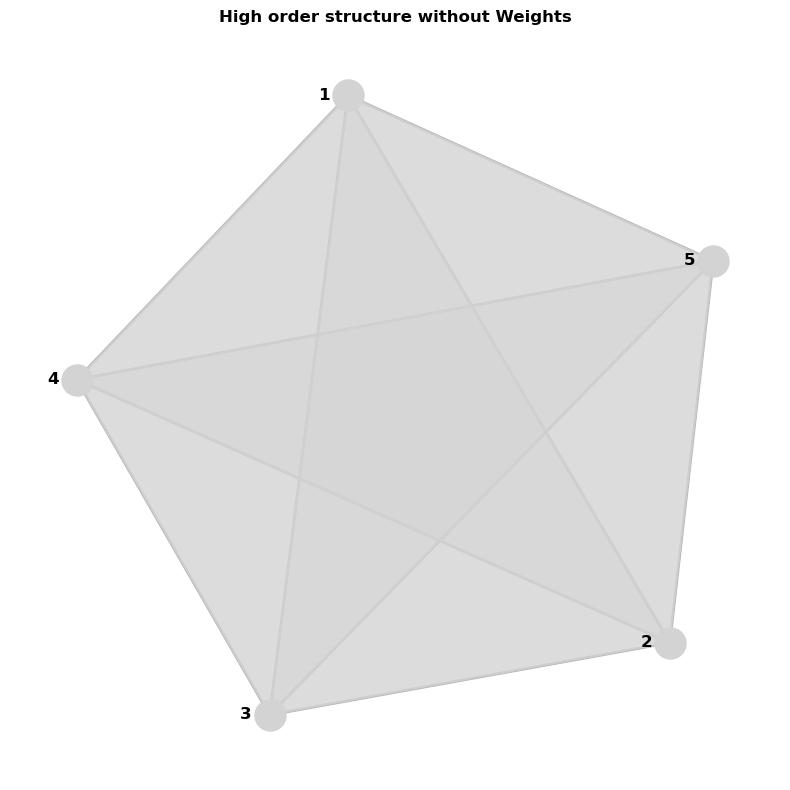

In [41]:
significance = 0

# Filter the interactions for a given significance and remove zero-weight hyperedges
hyperedges = {k: v for k, v in Ninfomut.items() if abs(v) > significance}

# Given simplices with weights
simplices = hyperedges

# Create a graph to represent the simplicial complex
G = nx.Graph()

# Add nodes for each vertex in the simplices
nodes = set()
for simplex in simplices:
    nodes.update(simplex)
G.add_nodes_from(nodes)

# Add edges for 2-simplices (pairs of nodes)
for simplex, weight in simplices.items():
    if len(simplex) == 2:  # Only add edges for 2-simplices
        G.add_edge(simplex[0], simplex[1])

# Create a layout for visualization
pos_G = nx.spring_layout(G, seed=42)

# Plot the simplicial complex
fig, ax = plt.subplots(figsize=(8, 8))  # Single plot

# Draw nodes
nx.draw_networkx_nodes(G, pos_G, node_size=500, node_color="lightgray", ax=ax)

# Draw edges
nx.draw_networkx_edges(G, pos_G, width=2, alpha=0.9, edge_color="darkgray", ax=ax)

# Fill triangles for 3-simplices in a shade of gray
for simplex in simplices:
    if len(simplex) == 3:  # Only consider 3-simplices
        # Extract the positions of the nodes
        node_positions = [pos_G[node] for node in simplex]
        # Create a Polygon to represent the triangle
        triangle = patches.Polygon(node_positions, closed=True, color='lightgray', alpha=0.4)
        # Add the triangle to the plot
        ax.add_patch(triangle)

# Set an adjustable offset for the node labels
offset = 0.07  # You can change this value to increase or decrease the distance of the label from the node

# Adjust the positions of the node number labels to ensure they are outside the nodes
adjusted_pos = {node: (x - offset, y) for node, (x, y) in pos_G.items()}

# Draw the node number labels with the adjusted positions
node_numbers = {n: str(n) for n in G.nodes()}
nx.draw_networkx_labels(G, adjusted_pos, labels=node_numbers, font_size=12, font_weight="bold", font_color="black", ax=ax)

# Set the title for the simplicial complex
ax.set_title("High order structure without Weights", fontweight="bold")

# Turn off the axis
ax.axis("off")

# Display the plot
plt.tight_layout()
plt.show()
